In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [266]:
file_path = 'C:/Users/hp/Desktop/Data Analytics/Assignments/Python/Python Foundation Case Study 1 - Retail Case Study_A2/'
customer = pd.read_csv( file_path + 'Customer.csv')
transaction = pd.read_csv( file_path + 'Transactions.csv')
product_info = pd.read_csv( file_path + 'Prod_cat_info.csv')

In [267]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [268]:
customer.rename( columns={'customer_Id':'cust_id'}, inplace=True)

In [269]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [270]:
product_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [271]:
product_info.rename( columns={'prod_sub_cat_code':'prod_subcat_code'}, inplace=True)

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [272]:
joined_data = pd.merge( left = customer, right = transaction, how = 'right',on  = 'cust_id')
Customer_Final = pd.merge( left = joined_data, right = product_info, how = 'left', on = ['prod_cat_code','prod_subcat_code'])

In [273]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])

In [274]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

2. Prepare a summary report for the merged data set.
     a. Get the column names and their corresponding data types
     b. Top/Bottom 10 observations
     c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
     d. Frequency tables for all the categorical variables

a. Get the column names and their corresponding data types 

In [276]:
Customer_Final.dtypes

cust_id                      int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

b. Top 10 observations

In [277]:
Customer_Final.loc[4, 'Qty' ] = 2
Customer_Final.loc[4, 'Rate' ] = 791
Customer_Final.loc[4, 'total_amt' ] = 1748.110

In [278]:
Customer_Final.head(10)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270384,1973-11-05,F,8.0,29258453508,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,273420,1992-07-27,M,8.0,51750724947,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,271509,1981-08-06,M,3.0,93274880719,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,273420,1992-07-27,M,8.0,51750724947,2014-02-23,6,5,2,791,166.110,1748.110,TeleShop,Books,DIY
5,272357,1982-09-10,F,6.0,97439039119,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances
6,273667,1981-05-29,M,9.0,45649838090,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath
7,271489,1971-04-21,M,9.0,22643667930,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools
8,275108,1971-04-11,F,8.0,79792372943,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids
9,269014,1979-11-27,F,3.0,50076728598,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances


b. Bottom 10 observations

In [279]:
Customer_Final.tail(10)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,271982,1976-10-08,M,8.0,49882891062,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction
23044,273982,1991-12-10,M,4.0,14787475597,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles
23045,273031,1980-01-17,F,8.0,50691119572,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY
23046,272049,1975-06-28,F,6.0,40893803228,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath
23047,266866,1974-04-18,M,4.0,30856003613,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids
23048,274550,1972-02-21,M,7.0,94340757522,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,270022,1984-04-27,M,9.0,89780862956,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,271020,1976-06-20,M,8.0,85115299378,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,270911,1970-05-22,M,2.0,72870271171,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children
23052,271961,1982-01-15,M,1.0,77960931771,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [280]:
Customer_Final[['Qty','Rate','Tax','total_amt']].describe()[3:9]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


d. Frequency tables for all the categorical variables:

In [281]:
Cust_Id = pd.crosstab (index = Customer_Final['cust_id'], columns='count')
Cust_Id

col_0,count
cust_id,
266783,5
266784,3
266785,8
266788,4
266794,12
...,...
275257,5
275261,5
275262,2


In [282]:
DateofBirth =pd.crosstab (index = Customer_Final['DOB'], columns='count')
DateofBirth

col_0,count
DOB,
1970-01-02,17
1970-01-04,8
1970-01-06,10
1970-01-07,3
1970-01-09,6
...,...
1992-12-19,3
1992-12-24,5
1992-12-25,5


In [283]:
Gender = pd.crosstab (index = Customer_Final[ 'Gender'], columns='count')
Gender

col_0,count
Gender,
F,11233
M,11811


In [284]:
Citycode = pd.crosstab (index = Customer_Final['city_code'], columns='count')
Citycode

col_0,count
city_code,
1.0,2258
2.0,2270
3.0,2411
4.0,2422
5.0,2360
6.0,2127
7.0,2356
8.0,2330
9.0,2178


In [285]:
Transactions = pd.crosstab (index = Customer_Final['transaction_id'], columns='count')
Transactions

col_0,count
transaction_id,
3268991,1
7073244,1
10861359,1
15741026,1
16165359,1
...,...
99963516507,2
99967775192,1
99985121471,1


In [286]:
TransDate = pd.crosstab (index = Customer_Final[ 'tran_date'], columns='count')
TransDate

col_0,count
tran_date,
2011-01-02,27
2011-01-03,16
2011-01-04,23
2011-01-05,23
2011-01-06,18
...,...
2014-10-02,18
2014-11-01,21
2014-11-02,20


In [287]:
Prodsubcatcode = pd.crosstab (index = Customer_Final['prod_subcat_code'], columns='count')
Prodsubcatcode

col_0,count
prod_subcat_code,
1,2950
2,1007
3,3067
4,4002
5,958
6,989
7,1043
8,972
9,985


In [288]:
Prodcatcode = pd.crosstab (index = Customer_Final['prod_cat_code'], columns='count')
Prodcatcode

col_0,count
prod_cat_code,
1,2960
2,2999
3,4898
4,1998
5,6069
6,4129


In [289]:
Storetype = pd.crosstab (index = Customer_Final['Store_type'], columns='count')
Storetype

col_0,count
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [290]:
Prodcat = pd.crosstab (index = Customer_Final[ 'prod_cat'], columns='count')
Prodcat

col_0,count
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


In [291]:
Prodsubcat = pd.crosstab (index = Customer_Final['prod_subcat'], columns='count')
Prodsubcat

col_0,count
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

Continuous Variables - 'Qty','Rate','Tax','total_amt'

In [292]:
Customer_Final[['Qty','Rate','Tax','total_amt']]

,Qty,Rate,Tax,total_amt
0,-5,-772,405.300,-4265.300
1,-5,-1497,785.925,-8270.925
2,-2,-791,166.110,-1748.110
3,-3,-1363,429.345,-4518.345
4,2,791,166.110,1748.110
...,...,...,...,...
23048,1,1264,132.720,1396.720
23049,1,677,71.085,748.085
23050,4,1052,441.840,4649.840
23051,3,1142,359.730,3785.730


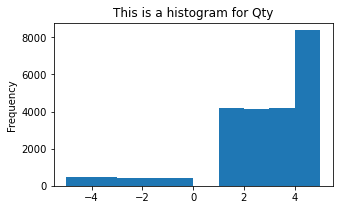

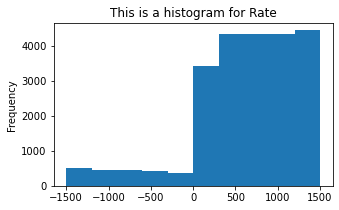

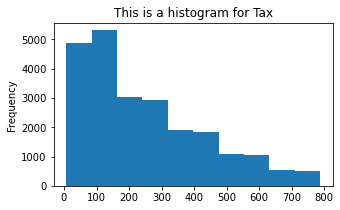

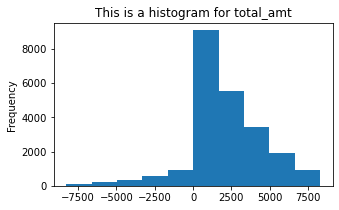

In [293]:
def func( x ):
    plt.figure( figsize = (5, 3) )
    plt.title( 'This is a histogram for ' + x.name )
    x.plot(kind = 'hist',bins=10)
    plt.show()

Customer_Final[['Qty','Rate','Tax','total_amt']].apply( func )
plt.show()

Categorical Variables - ('customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id','tran_date', 'prod_subcat_code', 'prod_cat_code','Store_type', 'prod_cat', 'prod_subcat')

In [294]:
cat_var = ['CustomerId','DateofBirth','Gender','Citycode','Transactions','TransDate','Prodsubcatcode','Prodcatcode','Storetype','Prodcat','Prodsubcat']
cat_var

['CustomerId',
 'DateofBirth',
 'Gender',
 'Citycode',
 'Transactions',
 'TransDate',
 'Prodsubcatcode',
 'Prodcatcode',
 'Storetype',
 'Prodcat',
 'Prodsubcat']

<AxesSubplot:ylabel='Gender'>

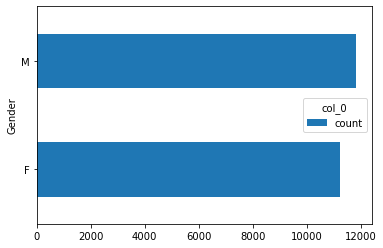

In [295]:
Gender.plot( kind = 'barh')

<AxesSubplot:ylabel='city_code'>

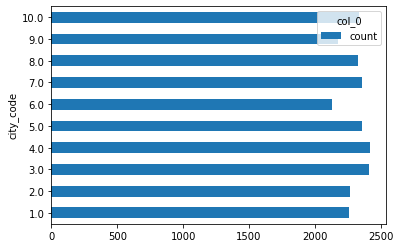

In [296]:
Citycode.plot( kind = 'barh' )

<AxesSubplot:ylabel='prod_subcat_code'>

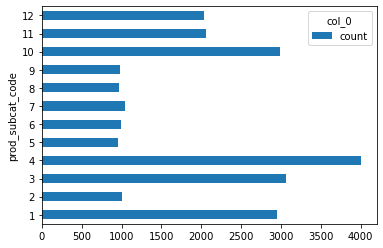

In [297]:
Prodsubcatcode.plot( kind = 'barh' )

<AxesSubplot:ylabel='Store_type'>

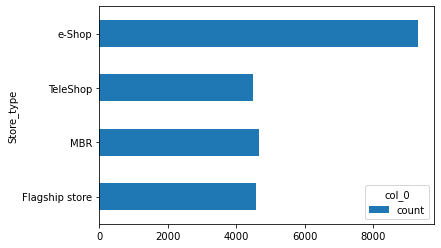

In [298]:
Storetype.plot( kind = 'barh' )

<AxesSubplot:ylabel='prod_cat'>

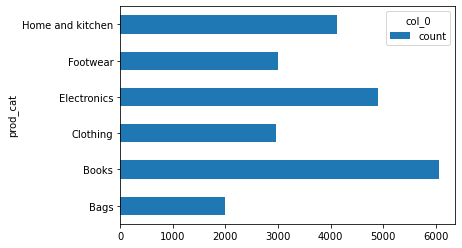

In [299]:
Prodcat.plot( kind = 'barh' )

<AxesSubplot:ylabel='prod_subcat'>

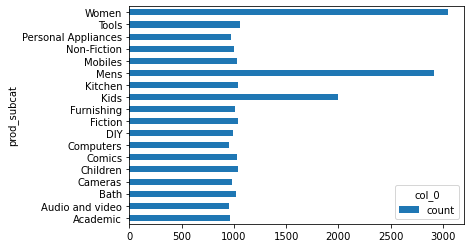

In [300]:
Prodsubcat.plot( kind = 'barh' )

4. Calculate the following information using the merged dataset :
     a. Time period of the available transaction data
     b. Count of transactions where the total amount of transaction was negative

a. Time period of the available transaction data"

In [301]:
a = pd.Timestamp.strftime(Customer_Final.tran_date.min(),format="%d-%m-%Y")
b = pd.Timestamp.strftime(Customer_Final.tran_date.max(),format="%d-%m-%Y")
print('Time period of the available transaction data is from',a,'to',b)

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


 b. Count of transactions where the total amount of transaction was negative

In [302]:
x = Customer_Final.loc[Customer_Final['total_amt'] < 0].total_amt.count()
print('Count of transactions where the total amount of transaction was negative is ',x)

Count of transactions where the total amount of transaction was negative is  2176


5. Analyze which product categories are more popular among females vs male customers.

In [303]:
pd.crosstab (index = Customer_Final[ 'prod_cat'], columns=Customer_Final['Gender'])

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


In [304]:
print(
'''1. Footwear is more popular product category among female customers than male customers.
2. Rest all product categories are more popular among male customers than female customers.''')

1. Footwear is more popular product category among female customers than male customers.
2. Rest all product categories are more popular among male customers than female customers.


6. Which City code has the maximum customers and what was the percentage of customers from 
that city?

In [305]:
codemax = Customer_Final.groupby('city_code').cust_id.count().sort_values(ascending =False)
codemax

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: cust_id, dtype: int64

In [306]:
y = round(codemax.max()/codemax.sum()*100,2)
y

10.51

In [307]:
print('City code with maximum customers : 4 | Percentage of customers from that city :',y,'%')

City code with maximum customers : 4 | Percentage of customers from that city : 10.51 %


7. Which store type sells the maximum products by value and by quantity?

In [308]:
Customer_Final.groupby('Store_type')[['total_amt', 'Qty']].sum().sort_values(by = 'total_amt',ascending =False).round(2)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763
Flagship store,9715688.19,11133
MBR,9674486.06,11194
TeleShop,9368277.30,10988


8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?

In [309]:
Customer_Final.groupby('prod_cat')[['total_amt'].sum().loc[['Clothing','Electronics']].round(2)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_7896/3489903032.py, line 1)

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [310]:
Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum').round(2)

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.24,6649469.00
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.42
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.34,4301075.48


In [311]:
males_earned = Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum').loc['Electronics','M'].round(2)
print('The total amount earned from Male customers under the Electronics category male_earnings :',males_earned)

The total amount earned from Male customers under the Electronics category male_earnings : 5703109.42


10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

In [312]:
transactions = Customer_Final.loc[Customer_Final['total_amt']>0]

In [313]:
unique_trans= transactions.groupby(['cust_id','transaction_id']).transaction_id.count()
unique_trans

cust_id  transaction_id
266783   8410316370        1
         16999552161       1
         25890929042       1
         98477711300       1
266784   26928161256       1
                          ..
275264   81382444243       1
         94712826085       1
275265   7214136016        1
         24113900219       1
         38961184788       1
Name: transaction_id, Length: 20876, dtype: int64

In [314]:
ut=unique_trans.groupby(['cust_id']).count()

In [315]:
y=ut[ut>10].count()

In [316]:
print('Customers having more than 10 unique transactions:',y)

Customers having more than 10 unique transactions: 6


11. For all customers aged between 25 - 35, find out:
     a. What was the total amount spent for “Electronics” and “Books” product categories?
     b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

a. What was the total amount spent for “Electronics” and “Books” product categories

In [317]:
Customer_Final['Age'] = pd.Timestamp.today().year - Customer_Final['DOB'].dt.year

In [318]:
aged_25_35 = Customer_Final.loc[(Customer_Final.Age >=23)&(Customer_Final.Age <=35)]
aged_25_35.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
2,273420,1992-07-27,M,8.0,51750724947,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,31
4,273420,1992-07-27,M,8.0,51750724947,2014-02-23,6,5,2,791,166.110,1748.110,TeleShop,Books,DIY,31
23,268509,1989-08-17,M,10.0,91116291703,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,34
28,268444,1992-02-01,F,6.0,88853694830,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,31
37,267058,1992-06-02,F,10.0,31384765864,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,31


In [319]:
amt_spent = round(aged_25_35.groupby(by = 'prod_cat').total_amt.sum(),2)
amt_spent

prod_cat
Bags                 873679.30
Books               2671281.14
Clothing            1443346.58
Electronics         2272147.41
Footwear            1433147.43
Home and kitchen    1864549.38
Name: total_amt, dtype: float64

In [320]:
amt_spent.loc[['Books','Electronics']]

prod_cat
Books          2671281.14
Electronics    2272147.41
Name: total_amt, dtype: float64

In [321]:
print('Total amount spent for "Electronics" and "Books" product categories : ', 
      amt_spent.loc[['Books','Electronics']].sum().round(2))

Total amount spent for "Electronics" and "Books" product categories :  4943428.55


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

In [322]:
amt_spent1 = aged_25_35.loc[(aged_25_35.tran_date >='01-01-2014') & (aged_25_35.tran_date <='01-03-2014')]

In [323]:
print('The total amount spent by the customers aged 25-35, between 1st Jan 2014 to 1st Mar 2014 is', amt_spent1.total_amt.sum().round(2))

The total amount spent by the customers aged 25-35, between 1st Jan 2014 to 1st Mar 2014 is 24725.48
